<a href="https://colab.research.google.com/github/vasuaw/computerVisionTF_Food_Classification/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Convolutional Neural Network**

Computer vision is practice of writing algorithms to identify patterns in Visuals Data.
Ex- self Driving car

In [ ]:
## 0. Get the Data

In [ ]:
## Import zipfile
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip  ## wget downloads and get into Collab

## unzip the zip file
zip_file=zipfile.ZipFile('pizza_steak.zip')
zip_file.extractall()
zip_file.close()

--2022-07-08 20:56:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   336MB/s    in 0.3s    

2022-07-08 20:56:42 (336 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
## Inspect the data,
## Means Visualizing many samples of Data

In [ ]:
!ls pizza_steak ## ls is used to list

test  train


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [ ]:
import os ## os is used to walkthrough

## walkthrough pizza directory and list number of files
for dirpath, dirname, filename in os.walk('pizza_steak'):
  print(f"There are {len(dirname)} in {dirpath} and {len(filename)} number of images")

There are 2 in pizza_steak and 0 number of images
There are 2 in pizza_steak/test and 0 number of images
There are 0 in pizza_steak/test/pizza and 250 number of images
There are 0 in pizza_steak/test/steak and 250 number of images
There are 2 in pizza_steak/train and 0 number of images
There are 0 in pizza_steak/train/pizza and 750 number of images
There are 0 in pizza_steak/train/steak and 750 number of images


In [ ]:
!ls -la pizza_steak   ## -la is used to user access

total 16
drwxr-xr-x 4 root root 4096 Jul  8 20:56 .
drwxr-xr-x 1 root root 4096 Jul  8 20:56 ..
drwxr-xr-x 4 root root 4096 Jul  8 20:56 test
drwxr-xr-x 4 root root 4096 Jul  8 20:56 train


In [ ]:
## Another way to check number of files

test_streak= len(os.listdir("pizza_steak/train/steak"))
test_streak

750

To get Data visualize, lets get data class programatically

In [ ]:
## 1.1 Getting class progamitcally
import pathlib
import numpy as np
dirpath=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in dirpath.glob("*")])) ## create a list of class_names in sub directories
print(class_names)

['pizza' 'steak']


In [ ]:
## Visualizing samples in matPlotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(path, target_class):
  ##Setup directory
  target_folder=path+ target_class

  ##Get a random image path
  random_image=random.sample(os.listdir(target_folder),1) ## from target_folder get 1 image path
  print(random_image)

  ## read the image and plot it using plt
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis();

  print(f"image shape is: {img.shape}") ## shape of image

  return img

['2705497.jpg']
image shape is: (512, 512, 3)


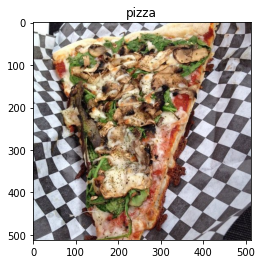

In [ ]:
img=view_random_image(path="pizza_steak/train/", target_class="pizza")

In [ ]:
## 1.2 Convert Image into numbers

import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 50,  41,  42],
        [ 51,  45,  45],
        [ 39,  33,  33]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 52,  43,  44],
        [ 52,  46,  46],
        [ 40,  34,  34]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 51,  42,  43],
        [ 48,  42,  42],
        [ 36,  30,  30]],

       ...,

       [[ 91,  88,  97],
        [ 84,  81,  90],
        [ 85,  82,  91],
        ...,
        [ 12,  10,  13],
        [ 17,  15,  18],
        [ 22,  20,  23]],

       [[ 96,  93, 104],
        [ 84,  81,  92],
        [ 82,  79,  90],
        ...,
        [ 43,  41,  44],
        [ 21,  19,  22],
        [  9,   7,  10]],

       [[103,  97, 109],
        [ 87,  84,  95],
        [ 81,  78,  89],
        ...,
        [ 71,  69,  7

In [ ]:
img.shape ## width, height, color channel

(512, 512, 3)

In [ ]:
## 1.3. Normalizescalling of number bT 0 and 1
img/255.

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.19607843, 0.16078431, 0.16470588],
        [0.2       , 0.17647059, 0.17647059],
        [0.15294118, 0.12941176, 0.12941176]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.20392157, 0.16862745, 0.17254902],
        [0.20392157, 0.18039216, 0.18039216],
        [0.15686275, 0.13333333, 0.13333333]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.2       , 0.16470588, 0.16862745],
        [0.18823529, 0.16470588, 0.16470588],
        [0.14117647, 0.11764706, 0.11764706]],

       ...,

       [[0.35686275, 0.34509804, 0.38039216],
        [0.32941176, 0.31764706, 0.35294118],
        [0.33333333, 0

We can do the above for all images/ data by Building end to end convolutional Neural network.
Specifically:
1. Load our images
2. Pre Process our Images
3. Build a CNN to find Patterns
4. Complete our CNN
5. Fit the CNN into our Data

In [ ]:
## CNN Architecture
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## Load our images

# set the seed
tf.random.set_seed(42)

# Preprocess data (Normalize/Scalling) in range 0 and 1
train_datagen= ImageDataGenerator(1./255)
test_datagen= ImageDataGenerator(1./255)

## setup path to our data directory
train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

# Import Data from Libraries and turn it into Images
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=test_datagen.flow_from_directory(directory=test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           seed=42)

## Build a CNN Model
model_1=tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10,3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                                     tf.keras.layers.Conv2D(10,3, activation="relu"),
                                     tf.keras.layers.Conv2D(10,3, activation="relu"),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1,activation="sigmoid")
])

##Compile our CNN
model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics="accuracy")

## Fit the model
history_1= model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
47/47 [==============================] - 25s 209ms/step - loss: 4.8692 - accuracy: 0.5960 - val_loss: 0.6372 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.5219 - accuracy: 0.7660 - val_loss: 0.5701 - val_accuracy: 0.7180
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3481 - accuracy: 0.8753 - val_loss: 0.5610 - val_accuracy: 0.7300
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.2268 - accuracy: 0.9273 - val_loss: 0.6129 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.1359 - accuracy: 0.9673 - val_loss: 0.6683 - val_accuracy: 0.7320


['199754.jpg']
image shape is: (512, 384, 3)
['3868959.jpg']
image shape is: (512, 512, 3)


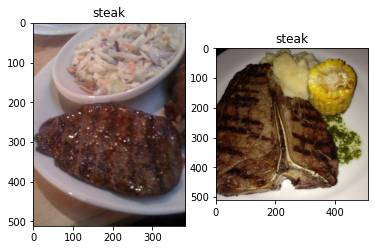

In [ ]:
## 1. Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img= view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img= view_random_image("pizza_steak/train/", "steak")

In [ ]:
## 2. Pre process the data(Prepare it for a model)

## define directory paths
train_dir="pizza_steak/train/"
test_data="pizza_steak/test/"

In [ ]:
## Turn Data into Batches. Small Dataset

## data generators and scalling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [ ]:
## load our data and make into batches
train_data=train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode="binary")
test_data=test_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels= train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
images[0]

array([[[0.427451  , 0.24313727, 0.07058824],
        [0.4156863 , 0.24313727, 0.06666667],
        [0.39607847, 0.22352943, 0.04705883],
        ...,
        [0.47450984, 0.28235295, 0.12156864],
        [0.48235297, 0.2901961 , 0.12941177],
        [0.48235297, 0.2901961 , 0.12941177]],

       [[0.40000004, 0.21568629, 0.04313726],
        [0.4039216 , 0.23137257, 0.05490196],
        [0.427451  , 0.25490198, 0.07843138],
        ...,
        [0.46274513, 0.27058825, 0.10980393],
        [0.46274513, 0.27058825, 0.10980393],
        [0.4666667 , 0.27450982, 0.1137255 ]],

       [[0.41176474, 0.227451  , 0.05490196],
        [0.39607847, 0.22352943, 0.04705883],
        [0.39607847, 0.22352943, 0.04705883],
        ...,
        [0.43921572, 0.24705884, 0.08627451],
        [0.45882356, 0.26666668, 0.10588236],
        [0.46274513, 0.27058825, 0.10980393]],

       ...,

       [[0.38431376, 0.34901962, 0.3137255 ],
        [0.4039216 , 0.36862746, 0.33333334],
        [0.39607847, 0

In [ ]:
## 3. Create a baseline for CNN model
## Make model easier
## Import dependencies
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [ ]:
model_4= Sequential([
                     Conv2D(
                         filters=10,
                         kernel_size=3,
                         strides=1,
                         padding="valid",
                         activation="relu",
                         input_shape=(224,224,3)),   ## Input Layers
                     Conv2D(10,3, activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     Flatten(),
                     Dense(1,activation="sigmoid")  ## Output Layers
])

In [ ]:
## compile
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["Accuracy"])

In [ ]:
## 4. FIT the Model
len(test_data), len(train_data)

(16, 47)

In [ ]:
history_4=model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 1.6906 - Accuracy: 0.6033 - val_loss: 0.5881 - val_Accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.5455 - Accuracy: 0.7393 - val_loss: 0.4663 - val_Accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4228 - Accuracy: 0.8247 - val_loss: 0.4364 - val_Accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.2961 - Accuracy: 0.8847 - val_loss: 0.3977 - val_Accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1585 - Accuracy: 0.9507 - val_loss: 0.4150 - val_Accuracy: 0.8300


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 133ms/step - loss: 0.6880 - accuracy: 0.5000


[0.6879602074623108, 0.5]